In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import time


In [2]:
img = cv2.imread('cat1.bmp')
img.shape

(549, 976, 3)

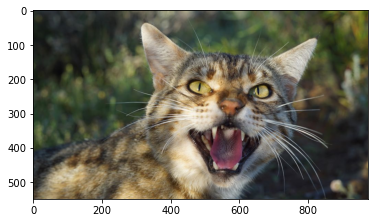

In [3]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
# reshape image
rows, cols = img.shape[0], img.shape[1]
img_data = img.reshape(rows * cols, 3)

In [5]:

num_of_centroids = 8 # a 4-bit image is represented by 2^4 colours
num_of_runs = 10 # number of times to run the k-means algorithm before determining the best centroids
max_iterations = 300 # number of iterations before k-means comes to an end for a single run
verbosity = 0 # show what's going on when the algorithm is running

start = time.time()
# initiate a kmeans object
compressor = KMeans(n_clusters=num_of_centroids, n_init=num_of_runs, max_iter=max_iterations, verbose=verbosity)
# run k-means clustering
compressor.fit(img_data)
print("Ran in {} seconds".format(time.time() - start))

Ran in 21.167389631271362 seconds


In [6]:
centers = np.asarray(compressor.cluster_centers_, dtype = np.uint8)
centers

array([[119, 145, 159],
       [ 47,  59,  54],
       [189, 211, 222],
       [ 72,  98, 105],
       [ 33,  35,  33],
       [ 96, 119, 129],
       [150, 176, 189],
       [ 59,  80,  78]], dtype=uint8)

In [7]:
labels = np.asarray(compressor.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

(535824,)
(549, 976)


array([[1, 1, 1, ..., 7, 7, 7],
       [1, 1, 1, ..., 7, 7, 7],
       [1, 1, 1, ..., 7, 7, 7],
       ...,
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4],
       [1, 1, 1, ..., 4, 4, 4]], dtype=uint8)

In [8]:
img_compressed = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            img_compressed[i, j, :] = centers[labels[i, j], :]


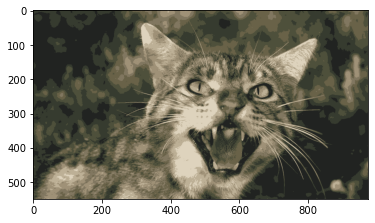

In [9]:
plt.imshow(cv2.cvtColor(img_compressed, cv2.COLOR_BGR2RGB))

In [10]:
range_k_clusters = []
a = 1
while (a < 256):
  a = a*2
  range_k_clusters.append(a)

range_k_clusters

[2, 4, 8, 16, 32, 64, 128, 256]

Ran in 2.6176657676696777 seconds
Ran in 7.647979497909546 seconds
Ran in 20.074548721313477 seconds
Ran in 47.8779137134552 seconds
Ran in 115.69021558761597 seconds
Ran in 185.21245193481445 seconds
Ran in 286.77491998672485 seconds
Ran in 594.8827879428864 seconds


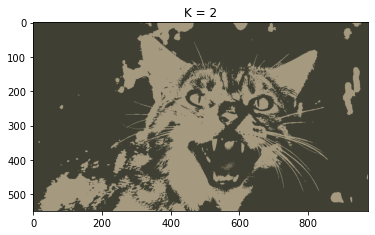

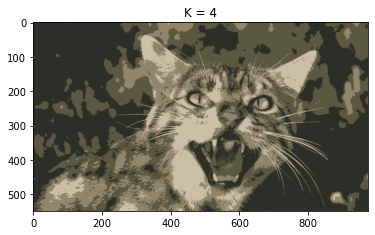

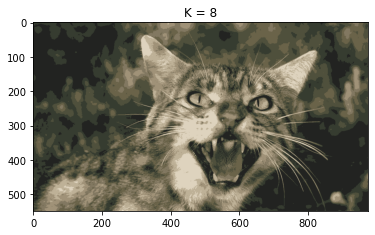

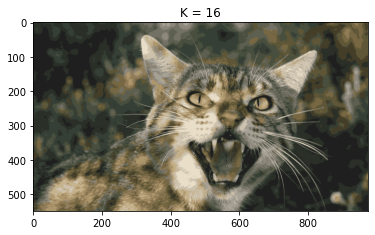

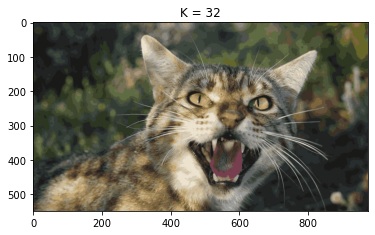

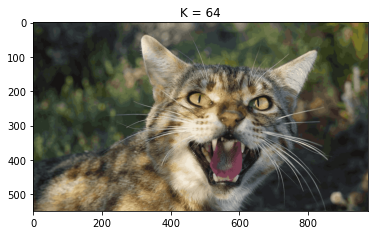

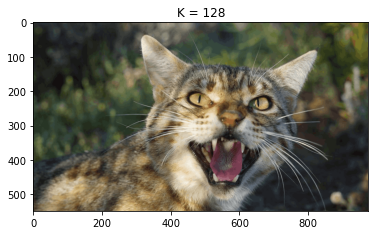

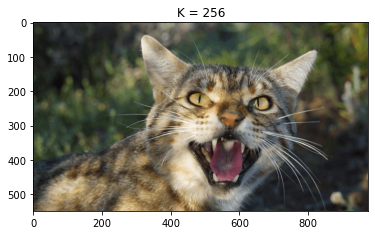

In [16]:
for k in range_k_clusters:
    num_of_runs = 10 # number of times to run the k-means algorithm before determining the best centroids
    max_iterations = 300 # number of iterations before k-means comes to an end for a single run
    verbosity = 0 # show what's going on when the algorithm is running
    start = time.time()
    # initiate a kmeans object
    compressor = KMeans(n_clusters=k, n_init=num_of_runs, max_iter=max_iterations, verbose=verbosity)
    # run k-means clustering
    compressor.fit(img_data)
    
    centers = np.asarray(compressor.cluster_centers_, dtype = np.uint8)
    
    labels = np.asarray(compressor.labels_, dtype = np.uint8)
#     print(labels.shape)
    labels = np.reshape(labels, (rows, cols))
    
    img_compressed = np.zeros((rows, cols, 3), dtype = np.uint8)
    for i in range(rows):
        for j in range(cols):
                # assinging every pixel the rgb color of their label's center 
                img_compressed[i, j, :] = centers[labels[i, j], :]
    print("Ran in {} seconds".format(time.time() - start))
    plt.figure()
    plt.title("K = {}".format(k))
    cv2.imwrite(str(k) + '.png', img_compressed)
    plt.imshow(cv2.cvtColor(img_compressed, cv2.COLOR_BGR2RGB))